In [1]:
!pip install scikit-Learn
!pip install networkX

**format: srcIP protocol dstIP sPort dPort**

14.112.37.26 17 14.112.37.29 138 138

14.112.37.26 17 14.112.37.33 80 80

14.112.37.27 6 14.112.37.34 167 80

14.112.37.28 6 14.112.37.29 443 443

14.112.37.26 17 14.112.37.33 443 80


**Un graphlet avec toutes les srcIP :**
![Image](https://i.imgur.com/63oJq4Q.png)


**Ou bien, un graphlet par srcIP :**

![s10551601232025](https://a.okmd.dev/md/6792120563530.png)
![s13370001222025](https://a.okmd.dev/md/6790e66fe8073.png)
![s13380301222025](https://a.okmd.dev/md/6790e6af42d7b.png)

1001 graphs have been created.
Example Graph: 
Graph for srcIP=732:
Label: normal
Nodes: ['srcIP_732', 'protocol_61', 'dstIP_17', 'sPort_80', 'dPort_53', 'protocol_869', 'dstIP_1', 'sPort_53', 'dPort_22', 'protocol_377', 'sPort_20', 'dPort_25', 'protocol_863', 'sPort_68', 'dPort_80', 'protocol_941', 'sPort_22', 'protocol_72', 'dstIP_6', 'sPort_443', 'protocol_489', 'sPort_79', 'protocol_304', 'sPort_23', 'dPort_23', 'protocol_897', 'protocol_889', 'dstIP_89']
Edges: [('srcIP_732', 'protocol_61'), ('srcIP_732', 'protocol_869'), ('srcIP_732', 'protocol_377'), ('srcIP_732', 'protocol_863'), ('srcIP_732', 'protocol_941'), ('srcIP_732', 'protocol_72'), ('srcIP_732', 'protocol_489'), ('srcIP_732', 'protocol_304'), ('srcIP_732', 'protocol_897'), ('srcIP_732', 'protocol_889'), ('protocol_61', 'dstIP_17'), ('dstIP_17', 'sPort_80'), ('dstIP_17', 'sPort_68'), ('dstIP_17', 'sPort_22'), ('dstIP_17', 'sPort_79'), ('dstIP_17', 'sPort_53'), ('sPort_80', 'dPort_53'), ('dPort_53', 'dstIP_17'), ('dPort_5

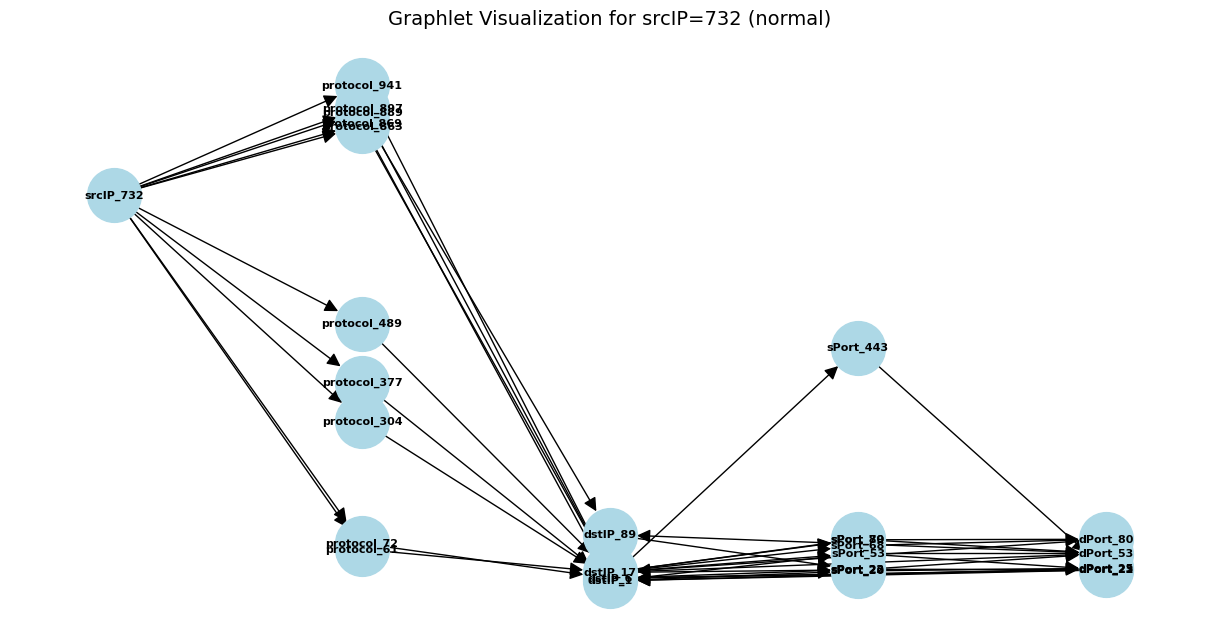

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def read_csv(file_path, has_label):
    """
    Reads a CSV file and returns a DataFrame.

    Parameters:
    - file_path (str): Path to the CSV file.
    - has_label (bool): Whether the CSV contains a 'label' column.
    """
    df = pd.read_csv(file_path, header=None)
    if has_label:
        df.columns = ['srcIP', 'protocol', 'dstIP', 'sPort', 'dPort', 'label']
    else:
        df.columns = ['srcIP', 'protocol', 'dstIP', 'sPort', 'dPort']
    return df

def create_graph_for_srcIP(group, has_label):
    """
    Creates a directed graph for a specific srcIP group.

    Parameters:
    - group (DataFrame): Grouped data for a specific srcIP.
    - has_label (bool): Whether the CSV contains a 'label' column.
    """
    G = nx.DiGraph()

    if has_label:
        has_anomaly = any(group['label'] == 'anomaly')
        G.graph['label'] = 'anomaly' if has_anomaly else 'normal'
    else:
        G.graph['label'] = 'unknown'

    for _, row in group.iterrows():
        if has_label:
            srcIP, protocol, dstIP, sPort, dPort, label = row
        else:
            srcIP, protocol, dstIP, sPort, dPort = row

        G.add_edge(f"srcIP_{srcIP}", f"protocol_{protocol}")
        G.add_edge(f"protocol_{protocol}", f"dstIP_{dstIP}")
        G.add_edge(f"dstIP_{dstIP}", f"sPort_{sPort}")
        G.add_edge(f"sPort_{sPort}", f"dPort_{dPort}")
        G.add_edge(f"dPort_{dPort}", f"dstIP_{dstIP}")  # 🔹 Ajout du lien entre dPort et dstIP

    return G


def visualize_graph(graph, srcIP):
    """
    Visualizes a graph.

    Parameters:
    - graph (DiGraph): Graph to visualize.
    - srcIP (int): The srcIP associated with the graph.
    """
    # Position nodes in a linear layout
    pos = {}
    layers = ['srcIP', 'protocol', 'dstIP', 'sPort', 'dPort']
    layer_index = {layer: i for i, layer in enumerate(layers)}

    for node in graph.nodes():
        layer_type = node.split('_')[0]
        pos[node] = (layer_index[layer_type], int(node.split('_')[1]) if '_' in node else 0)

    # Draw the graph
    plt.figure(figsize=(12, 6))
    nx.draw(graph, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=8, font_weight='bold', arrowsize=20)

    # Add title
    plt.title(f"Graphlet Visualization for srcIP={srcIP} ({graph.graph['label']})", fontsize=14)
    plt.axis('off')
    plt.show()

def main(file_path, srcIP_to_visualize, has_label=True, graphs_by_srcIP=None):
    """
    Main function to process a CSV file and visualize a specific graph.

    Parameters:
    - file_path (str): Path to the CSV file.
    - srcIP_to_visualize (int): The srcIP to visualize.
    - has_label (bool): Indicates if the CSV file has a 'label' column.
    - graphs_by_srcIP (dict): Optional dictionary to store graphs by srcIP. If None, a new dictionary will be created.
    """
    if graphs_by_srcIP is None:
        graphs_by_srcIP = {}

    # Read the CSV file
    data = read_csv(file_path, has_label)
    grouped = data.groupby('srcIP')

    # Create graphs for each srcIP
    for srcIP, group in grouped:
        graph = create_graph_for_srcIP(group, has_label)
        graphs_by_srcIP[srcIP] = graph

    print(f"{len(graphs_by_srcIP)} graphs have been created.")
    print("==========================================")

    # Visualize the graph for the specified srcIP
    if srcIP_to_visualize in graphs_by_srcIP:
        graph = graphs_by_srcIP[srcIP_to_visualize]
        print(f"Example Graph: \nGraph for srcIP={srcIP_to_visualize}:")
        print(f"Label: {graph.graph['label']}")
        print(f"Nodes: {list(graph.nodes())}")
        print(f"Edges: {list(graph.edges())}")

        # Visualize the graph
        visualize_graph(graph, srcIP_to_visualize)
    else:
        print(f"No graph found for srcIP={srcIP_to_visualize}.")

# Example usage
graphs_by_srcIP = {}
main('annotated-trace.csv', 732, has_label=True, graphs_by_srcIP=graphs_by_srcIP)


#TODO à dégager après test

In [3]:
import networkx as nx

def check_longest_paths(graphs_by_srcIP):
    """Affiche la longueur maximale des chemins dans chaque graphe."""
    for srcIP, graph in graphs_by_srcIP.items():
        longest_path_length = 0

        for node in graph.nodes():
            for target in graph.nodes():
                if node != target:
                    try:
                        path_length = len(nx.shortest_path(graph, node, target)) - 1
                        longest_path_length = max(longest_path_length, path_length)
                    except nx.NetworkXNoPath:
                        pass  # Pas de chemin entre ces deux nœuds

        print(f"🔍 Graphe {srcIP} : Longueur max d’un chemin = {longest_path_length}")

# 🔥 Exécuter la vérification
check_longest_paths(graphs_by_srcIP)


🔍 Graphe 1 : Longueur max d’un chemin = 9
🔍 Graphe 2 : Longueur max d’un chemin = 7
🔍 Graphe 3 : Longueur max d’un chemin = 6
🔍 Graphe 4 : Longueur max d’un chemin = 6
🔍 Graphe 5 : Longueur max d’un chemin = 6
🔍 Graphe 6 : Longueur max d’un chemin = 6
🔍 Graphe 7 : Longueur max d’un chemin = 6
🔍 Graphe 8 : Longueur max d’un chemin = 6
🔍 Graphe 9 : Longueur max d’un chemin = 9
🔍 Graphe 10 : Longueur max d’un chemin = 7
🔍 Graphe 11 : Longueur max d’un chemin = 7
🔍 Graphe 12 : Longueur max d’un chemin = 8
🔍 Graphe 13 : Longueur max d’un chemin = 5
🔍 Graphe 14 : Longueur max d’un chemin = 7
🔍 Graphe 15 : Longueur max d’un chemin = 6
🔍 Graphe 16 : Longueur max d’un chemin = 9
🔍 Graphe 17 : Longueur max d’un chemin = 8
🔍 Graphe 18 : Longueur max d’un chemin = 6
🔍 Graphe 19 : Longueur max d’un chemin = 7
🔍 Graphe 20 : Longueur max d’un chemin = 7
🔍 Graphe 21 : Longueur max d’un chemin = 7
🔍 Graphe 22 : Longueur max d’un chemin = 7
🔍 Graphe 23 : Longueur max d’un chemin = 6
🔍 Graphe 24 : Longue

# Fonctions Question 6

In [4]:
def compute_all_walks(graph, walk_length):
    """
    Calcule toutes les marches de longueur exacte `walk_length` en partant des nœuds de type 'protocol_*'.

    Args:
        graph (nx.DiGraph): Le graphlet pour lequel on veut calculer les marches.
        walk_length (int): Longueur des marches.

    Returns:
        list: Une liste de tuples représentant les chemins de longueur `walk_length`.
    """
    all_walks = []

    def dfs(current_path):
        # Si la marche atteint la longueur souhaitée, l'ajouter aux résultats
        if len(current_path) == walk_length:
            all_walks.append(tuple(current_path))
            return

        # Continuer à explorer les voisins du dernier nœud
        last_node = current_path[-1]
        for neighbor in graph.successors(last_node):
            dfs(current_path + [neighbor])

    # Démarrer l'exploration DFS uniquement depuis les nœuds 'protocol_*'
    for node in graph.nodes():
        if node.startswith("protocol_"):  # Ne commencer que depuis ces nœuds
            dfs([node])

    return all_walks


In [5]:

def create_Unique_Walk_list(graphs_by_srcIP):
    all_walks = []  # Pour collecter tous les chemins uniques

    # Parcourir chaque graphlet pour collecter les marches aléatoires
    for srcIP, graph in graphs_by_srcIP.items():
        walks = compute_all_walks(graph, walk_length=4)  # Calculer les marches de longueur 4
        all_walks.extend(walks)  # Ajouter les marches de ce graphlet à la liste globale

    # Identifier les chemins uniques globaux
    unique_walks = list(set(all_walks))  # Chemins uniques
    walk_index = {walk: i for i, walk in enumerate(unique_walks)}  # Map marche -> index


    print(f"Nombre total de marches uniques : {len(unique_walks)}")
    return unique_walks, walk_index


In [6]:
def create_vector_for_graphlet(graphs_by_srcIP, unique_walks, walk_index):
    graphlet_vectors = {}  # Stockage des vecteurs pour chaque graphlet

    for srcIP, graph in graphs_by_srcIP.items():
        vector = np.zeros(len(unique_walks))  # Taille = Nombre total de chemins uniques
        walks = compute_all_walks(graph, walk_length=4)  # Récupérer les marches de ce graphlet (longueur 4 ici)
        for walk in walks:
            if walk in walk_index:  # Vérifier si la marche est bien dans l'encodage global
                vector[walk_index[walk]] += 1  # Incrémenter pour chaque marche
        graphlet_vectors[srcIP] = vector  # Associer le vecteur à la srcIP
    return graphlet_vectors


In [7]:
def RWK_without_KT(graphs_by_srcIP):
    start = time.time()
    unique_walks, walk_index=create_Unique_Walk_list(graphs_by_srcIP)
    graphlet_vectors=create_vector_for_graphlet(graphs_by_srcIP, unique_walks, walk_index)
    srcIPs = list(graphlet_vectors.keys())  # Toutes les srcIP
    n = len(srcIPs)  # Nombre de graphlets
    dot_product_matrix = np.zeros((n, n))  # Matrice de produit scalaire

    # Calcul du produit scalaire pour chaque paire de graphlets
    for i in range(n):
        for j in range(n):
            vector1 = graphlet_vectors[srcIPs[i]]
            vector2 = graphlet_vectors[srcIPs[j]]
            dot_product_matrix[i, j] = np.dot(vector1, vector2)
    end = time.time()
    time_without_kernelTrick=end-start

    print(f"Temps d'exécution : {time_without_kernelTrick:.2f} secondes")

    print("Matrice de produit scalaire :")
    print(dot_product_matrix)
    return graphlet_vectors, srcIPs



In [8]:
# # Définir un seuil pour détecter les similarités élevées
# similarity_threshold = 1  # Par exemple, des valeurs supérieures à 100
# similar_pairs = []

# n = len(srcIPs)
# for i in range(n):
#     for j in range(i + 1, n):  # Éviter les doublons et la diagonale
#         value = dot_product_matrix[i, j]
#         if value >= similarity_threshold:
#             similar_pairs.append((srcIPs[i], srcIPs[j], value))

# # Trier les paires par valeur décroissante
# similar_pairs = sorted(similar_pairs, key=lambda x: -x[2])

# print("Top 5 des paires de graphlets similaires :")
# for srcIP1, srcIP2, value in similar_pairs[:35]:
#     print(f"{srcIP1} et {srcIP2} avec un produit scalaire de {value}")


In [9]:
# def train_svm(kernel_matrix, labels):
#     """Entraîne un modèle SVM avec la matrice de noyau et les labels, correctement divisés."""
#     n = len(labels)
#     indices = np.arange(n)  # Crée un tableau d'indices (0, 1, ..., n-1)

#     # Diviser les indices en ensembles d'entraînement et de test
#     train_indices, test_indices = train_test_split(indices, test_size=0.3, random_state=42)

#     # Extraire les sous-matrices et sous-labels correspondants
#     X_train = kernel_matrix[np.ix_(train_indices, train_indices)]  # Matrice carrée pour l'entraînement
#     X_test = kernel_matrix[np.ix_(test_indices, train_indices)]  # Matrice entre test et train
#     y_train = labels[train_indices]
#     y_test = labels[test_indices]


#     # Entraîner le modèle SVM
#     clf = SVC(kernel='precomputed')
#     clf.fit(X_train, y_train)

#     # Prédire et évaluer
#     y_pred = clf.predict(X_test)
#     print(classification_report(y_test, y_pred))

# Fonctions Question 8

In [10]:
from collections import Counter
import time
import networkx as nx  # Assure-toi que NetworkX est bien importé

def generate_walks(graph, length):
    """Génère toutes les marches aléatoires de longueur donnée en ignorant le premier nœud (srcIP)."""
    walks = []

    # Vérification : est-ce que le graphe a des arêtes ?
    if len(graph.edges()) == 0:
        print(f"⚠ Le graphe {graph} est vide, aucune marche possible.")
        return walks  # Retourne une liste vide

    for node in graph.nodes():
        if node.startswith("srcIP_"):  # On ignore les srcIP
            continue
        stack = [(node, [node])]
        while stack:
            current_node, path = stack.pop()
            if len(path) == length + 1:
                walks.append(tuple(path))
            elif len(path) < length + 1:
                for neighbor in graph.successors(current_node):
                    stack.append((neighbor, path + [neighbor]))

    # Affichage si aucun chemin trouvé
    if not walks:
        print(f"⚠ Aucun chemin trouvé pour un graphe avec {len(graph.nodes())} nœuds et {len(graph.edges())} arêtes.")

    return walks


def random_walk_kernel(graph1, graph2, walk_length):
    """Calcule le Random Walk Kernel entre deux graphes."""


    # Vérifier que la longueur demandée est cohérente
    if walk_length < 1:
        print("⚠ Longueur de marche trop courte !")
        return 0

    # Vérification des nœuds et arêtes avant génération des marches


    # Génère les marches aléatoires pour chaque graphe
    walks1 = compute_all_walks(graph1, walk_length)
    walks2 = compute_all_walks(graph2, walk_length)

        # Vérifier si les marches existent avant d'afficher
    if walks1 and walks2:
        print("🛤️ Premières marches de walks1 et walks2 :")
        print(f"Walk 1 - Marche 1 : {walks1[0] if len(walks1) > 0 else 'Aucune marche trouvée'}")
        print(f"Walk 1 - Marche 2 : {walks1[1] if len(walks1) > 1 else 'Moins de deux marches'}")

        print(f"Walk 2 - Marche 1 : {walks2[0] if len(walks2) > 0 else 'Aucune marche trouvée'}")
        print(f"Walk 2 - Marche 2 : {walks2[1] if len(walks2) > 1 else 'Moins de deux marches'}")
    else:
        print("⚠ Aucun chemin généré pour l'un des graphes.")



    # Vérification si des marches sont générées
    if not walks1 or not walks2:
        print("⚠ Aucune marche générée pour au moins un des graphes.")
        return 0

    # Compte la fréquence des marches dans chaque graphe
    freq1 = Counter(walks1)
    freq2 = Counter(walks2)

    # Affichage d'une comparaison entre deux graphes (une seule fois)




    # Calcule le produit scalaire entre les fréquences des marches communes
    common_walks = set(freq1.keys()) & set(freq2.keys())
    similarity = sum(freq1[walk] * freq2[walk] for walk in common_walks)


    return similarity


def get_longest_path_length(G):
    """Renvoie la longueur du plus long chemin possible en évitant l'erreur NetworkXNoPath."""
    longest_path_length = 0

    for source in G.nodes():
        for target in G.nodes():
            if source != target and nx.has_path(G, source, target):  # Vérifie d'abord si un chemin existe
                try:
                    path_length = len(nx.shortest_path(G, source=source, target=target)) - 1
                    longest_path_length = max(longest_path_length, path_length)
                except nx.NetworkXNoPath:
                    pass  # Ignore si aucun chemin n'existe

    return longest_path_length



def RWK_with_KT(walk_length, graphs_by_srcIP):
    """Calcule RWK entre chaque paire de graphes en limitant à 10 graphes."""
    start = time.time()
    results = {}
    srcIPs = list(graphs_by_srcIP.keys())



    for i, srcIP_1 in enumerate(srcIPs):
        for j, srcIP_2 in enumerate(srcIPs):
            if i < j:
                G_1 = graphs_by_srcIP[srcIP_1]
                G_2 = graphs_by_srcIP[srcIP_2]


                # Calcul du RWK
                rwk = random_walk_kernel(G_1, G_2, walk_length)

                # Stocke le résultat
                results[(srcIP_1, srcIP_2)] = rwk

                # Affichage progressif pour suivi


    end = time.time()
    print(f"\n⏳ Temps d'exécution : {end - start:.2f} secondes")

    # Enregistrement des résultats
    with open("rwk_results.csv", "w") as file:
        file.write("srcIP_1,srcIP_2,rwk\n")
        for (srcIP_1, srcIP_2), rwk in results.items():
            file.write(f"{srcIP_1},{srcIP_2},{rwk}\n")

    print("📂 RWK comparisons completed and results saved to rwk_results.csv.")



In [11]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Étape 1 : Charger ou construire la matrice de noyau
def load_kernel_matrix(file_path):
    """Charge la matrice de noyau pré-calculée et les étiquettes associées."""
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    srcIP_1, srcIP_2, rwk_values = data[:, 0], data[:, 1], data[:, 2]

    # Construire la matrice de noyau
    unique_srcIPs = np.unique(np.concatenate([srcIP_1, srcIP_2]))
    srcIP_to_index = {srcIP: idx for idx, srcIP in enumerate(unique_srcIPs)}
    n = len(unique_srcIPs)
    kernel_matrix = np.zeros((n, n))

    for i in range(len(rwk_values)):
        idx1 = srcIP_to_index[srcIP_1[i]]
        idx2 = srcIP_to_index[srcIP_2[i]]
        kernel_matrix[idx1, idx2] = rwk_values[i]
        kernel_matrix[idx2, idx1] = rwk_values[i]

    return kernel_matrix, unique_srcIPs


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# def train_svm(kernel_matrix, labels):
#     """Entraîne un modèle SVM avec la matrice de noyau et les labels, correctement divisés."""
#     n = len(labels)
#     indices = np.arange(n)  # Crée un tableau d'indices (0, 1, ..., n-1)

#     # Diviser les indices en ensembles d'entraînement et de test
#     train_indices, test_indices = train_test_split(indices, test_size=0.3, random_state=42)

#     # Extraire les sous-matrices et sous-labels correspondants
#     X_train = kernel_matrix[np.ix_(train_indices, train_indices)]  # Matrice carrée pour l'entraînement
#     X_test = kernel_matrix[np.ix_(test_indices, train_indices)]  # Matrice entre test et train
#     y_train = labels[train_indices]
#     y_test = labels[test_indices]


#     # Entraîner le modèle SVM
#     clf = SVC(kernel='precomputed')
#     clf.fit(X_train, y_train)

#     # Prédire et évaluer
#     y_pred = clf.predict(X_test)
#     print(classification_report(y_test, y_pred))




# Fonction SVM (Question 7)

In [12]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def train_svm(X, y=None, kernel_type='linear', test_size=0.3, random_state=42, mode='train', model=None, train_indices=None):
    """
    Entraîne un SVM ou effectue des prédictions sur de nouvelles données.

    Paramètres:
    - X: Matrice de kernel ou vecteurs de features (pour train ou test).
    - y: Labels (nécessaires en mode 'train').
    - kernel_type: 'precomputed' ou 'linear'.
    - test_size: Proportion pour le test split (en mode 'train').
    - random_state: Graine pour reproductibilité (en mode 'train').
    - mode: 'train' ou 'test'. En mode 'test', un modèle pré-entraîné est requis.
    - model: Modèle SVM pré-entraîné (nécessaire en mode 'test').
    - train_indices: Indices d'entraînement utilisés en mode test (pour assurer la cohérence des dimensions).

    Retourne:
    - En mode 'train': Le modèle SVM entraîné et les indices d'entraînement.
    - En mode 'test': Les prédictions pour les données X.
    """
    if mode == 'train':
        # Vérification des labels
        if y is None:
            raise ValueError("y must be provided in 'train' mode.")

        # Encoder les labels si nécessaire
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)

        # Split des données
        if kernel_type == 'precomputed':
            # Split basé sur les indices pour kernel matrix
            n = len(y)
            indices = np.arange(n)
            train_indices, test_indices = train_test_split(indices, test_size=test_size, random_state=random_state)

            X_train = X[np.ix_(train_indices, train_indices)]  # Matrice carrée (n_train, n_train)
            X_test = X[np.ix_(test_indices, train_indices)]  # Matrice rectangulaire (n_test, n_train)
            y_train = y_encoded[train_indices]
            y_test = y_encoded[test_indices]
        else:
            # Split standard pour features
            X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=random_state)

        # Entraîner le SVM
        svm = SVC(kernel=kernel_type)
        svm.fit(X_train, y_train)

        # Prédiction et évaluation
        y_pred = svm.predict(X_test)
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

        return svm, train_indices  # Retourne le modèle entraîné et les indices d'entraînement

    elif mode == 'test':
        if model is None:
            raise ValueError("A pre-trained model must be provided in 'test' mode.")
        if train_indices is None:
            raise ValueError("Train indices must be provided in test mode for kernel='precomputed'.")

        # Correction : Ajuster X_test pour ne garder que les colonnes correspondant aux indices d'entraînement
        X_test = X[:, train_indices]  # On ne garde que les colonnes de train_indices
        print(f"X en mode test après correction : {X_test.shape}")  # Doit être (n_test, n_train)

        # Prédictions pour les nouvelles données
        y_pred = model.predict(X_test)

        return y_pred  # Retourne les prédictions

    else:
        raise ValueError("Mode must be 'train' or 'test'.")


# Calculs et tests de temps pour RWK avec et sans kernel trick

In [13]:
start = time.time()
graphlet_vectors, srcIPs=RWK_without_KT(graphs_by_srcIP)
X = np.array(list(graphlet_vectors.values()))  # Les vecteurs des graphlets
y = np.array([graphs_by_srcIP[srcIP].graph['label'] for srcIP in srcIPs])
svm_without_KT=train_svm(X, y=y, kernel_type='linear', mode='train')
end = time.time()
print(f"Temps d'exécution avec classif: {end-start:.2f} secondes")

Nombre total de marches uniques : 52991
Temps d'exécution : 40.03 secondes
Matrice de produit scalaire :
[[ 36.   0.   0. ...   0.   0.   0.]
 [  0. 108.   0. ...   0.   0.   0.]
 [  0.   0. 108. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  55.   0.   0.]
 [  0.   0.   0. ...   0.  20.   0.]
 [  0.   0.   0. ...   0.   0.   7.]]
              precision    recall  f1-score   support

     anomaly       1.00      0.20      0.33        15
      normal       0.96      1.00      0.98       286

    accuracy                           0.96       301
   macro avg       0.98      0.60      0.66       301
weighted avg       0.96      0.96      0.95       301

Temps d'exécution avec classif: 74.12 secondes


In [14]:
import os
start=time.time()
kernel_file_path = "rwk_results.csv"  # Chemin vers le fichier contenant les RWK
if os.path.exists(kernel_file_path):
  RWK_with_KT(5, graphs_by_srcIP)
kernel_file_path = "rwk_results.csv"  # Chemin vers le fichier contenant les RWK
kernel_matrix, unique_srcIPs = load_kernel_matrix(kernel_file_path)
X = kernel_matrix
y = [graphs_by_srcIP[srcIP].graph['label'] for srcIP in srcIPs]
svm_with_KT, train_indices = train_svm(X, y,test_size=0.5, kernel_type='precomputed')
end=time.time()
print(f"Temps d'exécution avec classif : {end-start:.2f} secondes")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Walk 2 - Marche 1 : ('protocol_523', 'dstIP_6', 'sPort_22', 'dPort_443', 'dstIP_6')
Walk 2 - Marche 2 : ('protocol_523', 'dstIP_6', 'sPort_22', 'dPort_53', 'dstIP_1')
🛤️ Premières marches de walks1 et walks2 :
Walk 1 - Marche 1 : ('protocol_653', 'dstIP_6', 'sPort_80', 'dPort_68', 'dstIP_6')
Walk 1 - Marche 2 : ('protocol_653', 'dstIP_6', 'sPort_80', 'dPort_80', 'dstIP_1')
Walk 2 - Marche 1 : ('protocol_504', 'dstIP_17', 'sPort_68', 'dPort_443', 'dstIP_17')
Walk 2 - Marche 2 : ('protocol_504', 'dstIP_17', 'sPort_68', 'dPort_443', 'dstIP_1')
🛤️ Premières marches de walks1 et walks2 :
Walk 1 - Marche 1 : ('protocol_653', 'dstIP_6', 'sPort_80', 'dPort_68', 'dstIP_6')
Walk 1 - Marche 2 : ('protocol_653', 'dstIP_6', 'sPort_80', 'dPort_80', 'dstIP_1')
Walk 2 - Marche 1 : ('protocol_524', 'dstIP_17', 'sPort_80', 'dPort_80', 'dstIP_17')
Walk 2 - Marche 2 : ('protocol_524', 'dstIP_17', 'sPort_80', 'dPort_80', 'dstIP_6

# Question 9

1001 graphs have been created.
Example Graph: 
Graph for srcIP=732:
Label: unknown
Nodes: ['srcIP_732', 'protocol_778', 'dstIP_1', 'sPort_68', 'dPort_25', 'protocol_254', 'dstIP_6', 'sPort_80', 'protocol_657', 'sPort_443', 'dPort_80', 'protocol_672', 'sPort_53', 'dPort_22', 'protocol_338', 'sPort_22', 'dPort_23', 'protocol_988', 'sPort_23', 'protocol_917', 'dPort_20', 'protocol_99', 'dstIP_17']
Edges: [('srcIP_732', 'protocol_778'), ('srcIP_732', 'protocol_254'), ('srcIP_732', 'protocol_657'), ('srcIP_732', 'protocol_672'), ('srcIP_732', 'protocol_338'), ('srcIP_732', 'protocol_988'), ('srcIP_732', 'protocol_917'), ('srcIP_732', 'protocol_99'), ('protocol_778', 'dstIP_1'), ('dstIP_1', 'sPort_68'), ('dstIP_1', 'sPort_53'), ('sPort_68', 'dPort_25'), ('dPort_25', 'dstIP_1'), ('dPort_25', 'dstIP_6'), ('protocol_254', 'dstIP_6'), ('dstIP_6', 'sPort_80'), ('dstIP_6', 'sPort_443'), ('dstIP_6', 'sPort_22'), ('dstIP_6', 'sPort_23'), ('sPort_80', 'dPort_25'), ('protocol_657', 'dstIP_6'), ('sPort

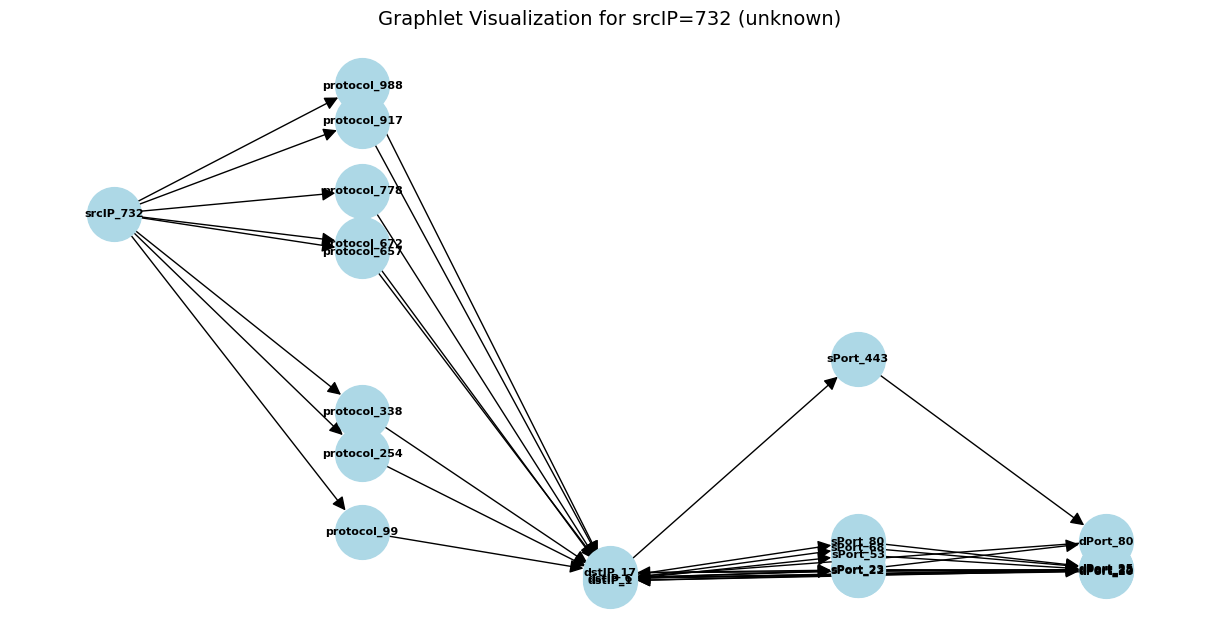

In [15]:
graphs_by_srcIP_not_labeled = {}
main('not-annotated-trace.csv', 732, has_label=False, graphs_by_srcIP=graphs_by_srcIP_not_labeled )

In [18]:
start=time.time()
kernel_file_path = "rwk_results_not_annoted.csv"  # Chemin vers le fichier contenant les RWK
if not os.path.exists(kernel_file_path):
    RWK_with_KT(5, graphs_by_srcIP_not_labeled)

kernel_matrix, unique_srcIPs = load_kernel_matrix(kernel_file_path)
X = kernel_matrix

print(f"X en mode test : {X.shape}")  # Doit être (n', n) en mode precomputed


X en mode test : (1001, 1001)


In [19]:
# Exécuter la prédiction
results = train_svm(X, kernel_type='precomputed', mode='test', model=svm_with_KT, train_indices=train_indices)

# Mesurer le temps d'exécution
end = time.time()
print(f"Temps d'exécution avec classification : {end - start:.2f} secondes")

# Afficher toutes les prédictions
print("Prédictions du modèle sur X_test :")
print(results)

# Compter le nombre de prédictions égales à 1
count = np.sum(results == 1)  # Utilisation de NumPy pour une meilleure performance
print(f"Nombre de prédictions égales à 1 : {count}")

# Afficher la longueur des résultats
print(f"Nombre total de prédictions : {len(results)}")


X en mode test après correction : (1001, 500)
Temps d'exécution avec classification : 0.86 secondes
Prédictions du modèle sur X_test :
[1 1 1 ... 1 1 1]
Nombre de prédictions égales à 1 : 988
Nombre total de prédictions : 1001
